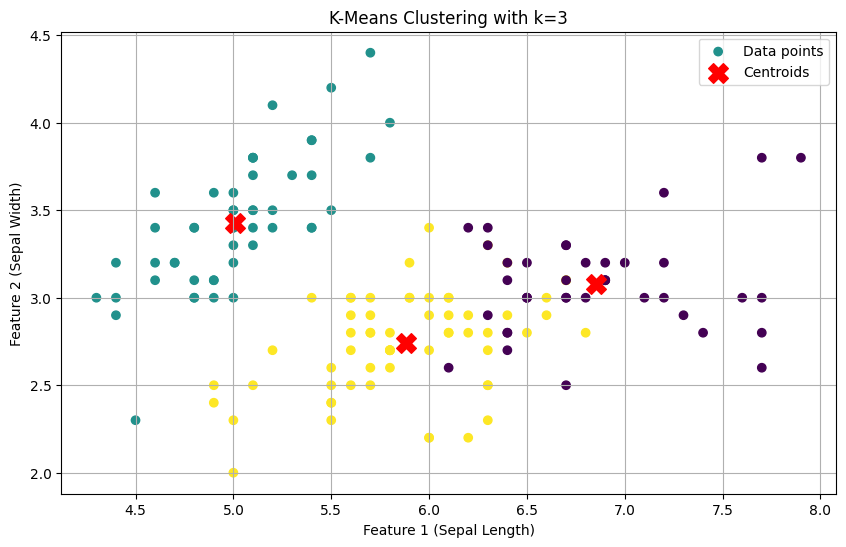

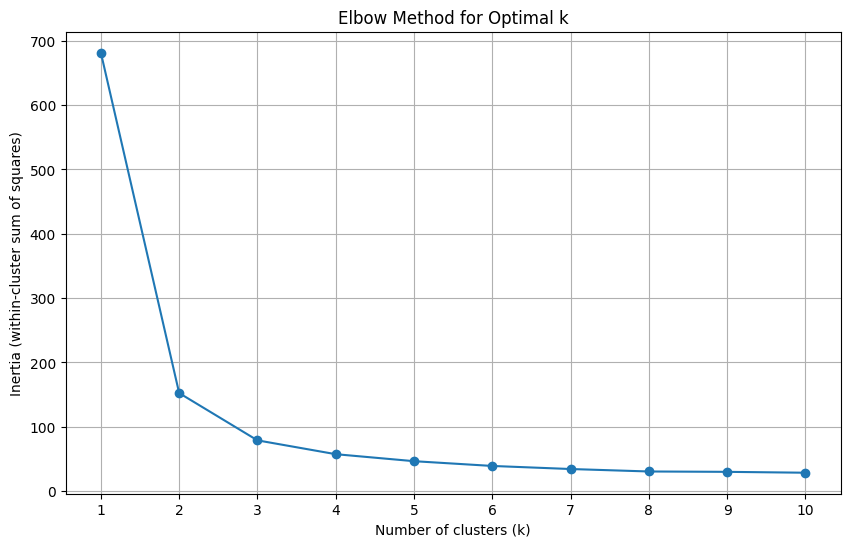

0.5511916046195917

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Perform K-Means Clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
predicted_labels = kmeans.fit_predict(X)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plotting the cluster centroids
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', marker='o', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with k=3')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.legend()
plt.grid()
plt.show()

# Evaluate clustering with Elbow Method
inertia = []  # within-cluster sum of squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid()
plt.show()

# Calculate the silhouette score for the predicted labels
silhouette_avg = silhouette_score(X, predicted_labels)

silhouette_avg

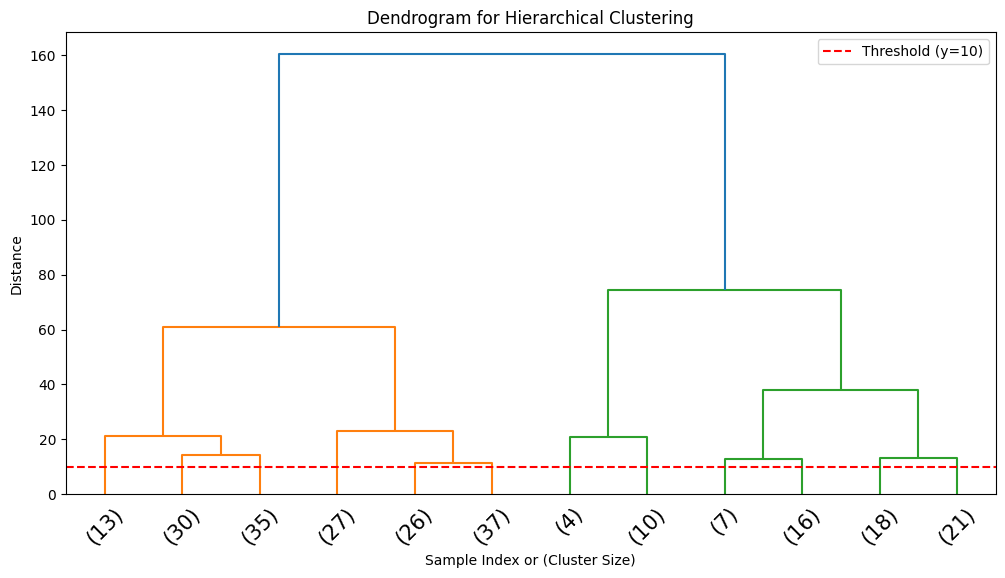

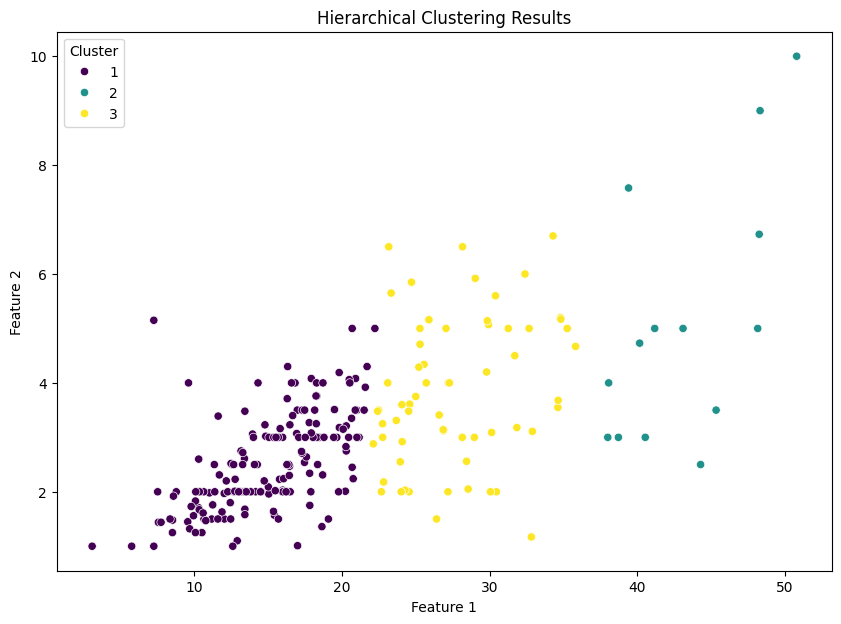

In [4]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the Mall Customers dataset from seaborn's sample data as a close alternative
# (In practice, replace this with actual Mall Customers data)
# Using 'tips' dataset for structure simulation if the dataset isn't preloaded here.
# Columns we’ll use for clustering could be similar: 'total_bill' and 'tip' (analogous to income/spending)

# For the actual Mall Customers data, you might have columns like 'Annual Income (k$)' and 'Spending Score (1-100)'.
# Since we're simulating here, we use analogous columns
data = sns.load_dataset('tips')
X = data[['total_bill', 'tip']]

# Perform hierarchical clustering using the linkage method
Z = linkage(X, method='ward')

max_d = 3 
data['hierarchical_cluster'] = fcluster(Z, max_d, criterion='maxclust')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15.)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.axhline(y=10, color='r', linestyle='--', label='Threshold (y=10)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['hierarchical_cluster'], palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()
